# Problem statement- check the rating and if rating is good then we will increase it otherwise we will improve it.The main goal of this project is to perform extensive Exploratory Data Analysis(EDA) on the Zomato Dataset and build an appropriate Machine Learning Model that will help various Zomato Restaurants to predict their respective Ratings based on certain features.

# Approach: The classical machine learning tasks like Data Exploration, Data Cleaning,Feature Engineering, Model Building and Model Testing. Try out different machine learning algorithms that’s best fit for the above case.

# Results: You have to build a solution that should able to predict the ratings of the restaurants listed in the dataset.

Let's import all the necessary libraries

In [3]:
import pandas as pd # Data manipulation
import numpy as np # Mathematical calculation
import matplotlib.pyplot as plt # Visualization(graph,histogram,pie chart, bar graph)
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib.
#It provides a high-level interface for drawing attractive and informative statistical graphics.
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')  

Let's load the data

In [4]:
data=pd.read_csv('zomato.csv')#research about encoding
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
data.shape #no. of rows and columns

(51717, 17)

In [6]:
data.columns.to_list()

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

# Data cleaning- Here we will clean our data for wrong datatypes,we will handle null values,remove irrelevant columns,outliers etc.

Let's rename the complex named columns for easy understanding

In [7]:
data.rename(columns={'approx_cost(for two people)':'approx_cost','listed_in(city)':'area'},inplace=True)

In [8]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost', 'reviews_list', 'menu_item', 'listed_in(type)', 'area'],
      dtype='object')

Let's drop the irrelevant columns

In [9]:
data.drop(['url','address','menu_item','reviews_list','dish_liked','phone','listed_in(type)'],axis=1,inplace=True)

In [10]:
df=data

In [11]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Banashankari


Let's check for datatypes

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   cuisines      51672 non-null  object
 8   approx_cost   51371 non-null  object
 9   area          51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


Let's check for "rate" columns

In [13]:
#unique values
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
#above excution there are many null and garbage values

In [15]:
df['rate']=df['rate'].str.replace('/5','')
df['rate']=df['rate'].str.replace('nan','NaN')
df['rate']=df['rate'].str.replace('NEW','NaN')
df['rate']=df['rate'].str.replace('-','NaN')
df['rate']=df['rate'].str.replace(' /5','')
df['rate']=df['rate'].fillna(np.nan)
df['rate']=df['rate'].str.replace(' ','')

In [16]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NaN', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

Let's check for "approx_cost" column

In [17]:
#unique values
df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [18]:
df['approx_cost']=df['approx_cost'].str.replace("nan","NaN")
df['approx_cost']=df['approx_cost'].fillna('NaN')
df['approx_cost']=df['approx_cost'].str.replace(",","")

In [19]:
df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'NaN', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

Now let's change the datatype object to float

In [20]:
df['approx_cost']=df['approx_cost'].astype(float)
df['rate']=df['rate'].astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          41665 non-null  float64
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   approx_cost   51371 non-null  float64
 9   area          51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


Let's check data description

In [22]:
df.describe()

,rate,votes,approx_cost
count,41665.000000,51717.000000,51371.000000
mean,3.700449,283.697527,555.431566
std,0.440513,803.838853,438.850728
min,1.800000,0.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


Let's check the null values

In [23]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
cuisines           45
approx_cost       346
area                0
dtype: int64

Let's check for the percentage of null values

In [24]:
(df.isnull().sum()/df.shape[0])*100

name             0.000000
online_order     0.000000
book_table       0.000000
rate            19.436549
votes            0.000000
location         0.040606
rest_type        0.438927
cuisines         0.087012
approx_cost      0.669026
area             0.000000
dtype: float64

From the above execution we found columns "location","rest_type","cusines","approx_cost" have less number of null values as compared to "rate" column. Let's drop the null values from them

In [25]:
df=df[df['location'].notna()]
df=df[df['rest_type'].notna()]
df=df[df['cuisines'].notna()]
df=df[df['approx_cost'].notna()]

In [26]:
df.isna().sum()

name               0
online_order       0
book_table         0
rate            9885
votes              0
location           0
rest_type          0
cuisines           0
approx_cost        0
area               0
dtype: int64

Let's handle the null values in "rate" column

In [27]:
df['rate'].describe()

count    41263.000000
mean         3.702011
std          0.439985
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

# Let's check the outliers by stastical method

In [28]:
q1=df['rate'].quantile(0.25) 
q3=df['rate'].quantile(0.75)  

xyz=q3-q1   #xyz=iqr(inter quartile range)

lower_range=q1-(1.5*xyz)
upper_range=q3+(1.5*xyz)

outliers=len(df[(df['rate']<lower_range) | (df['rate']>upper_range)])
print('Number of rows having outliers: ',outliers)

Number of rows having outliers:  183


From the above execution we found that we have 183 outliers in the "rate" columns but we all know rating is always in the range from 1 to 5,so we will impute the median

In [29]:
df['rate']=df['rate'].fillna(df['rate'].median())
df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
area            0
dtype: int64

# Let's check for the numeric columns

In [30]:
Numerical_features=[feature for feature in df.columns if df[feature].dtypes !='O']
print("There are {} numerical features and their names are {}".format(len(Numerical_features),Numerical_features))

There are 3 numerical features and their names are ['rate', 'votes', 'approx_cost']


Let's check for the distribution of the numerical features

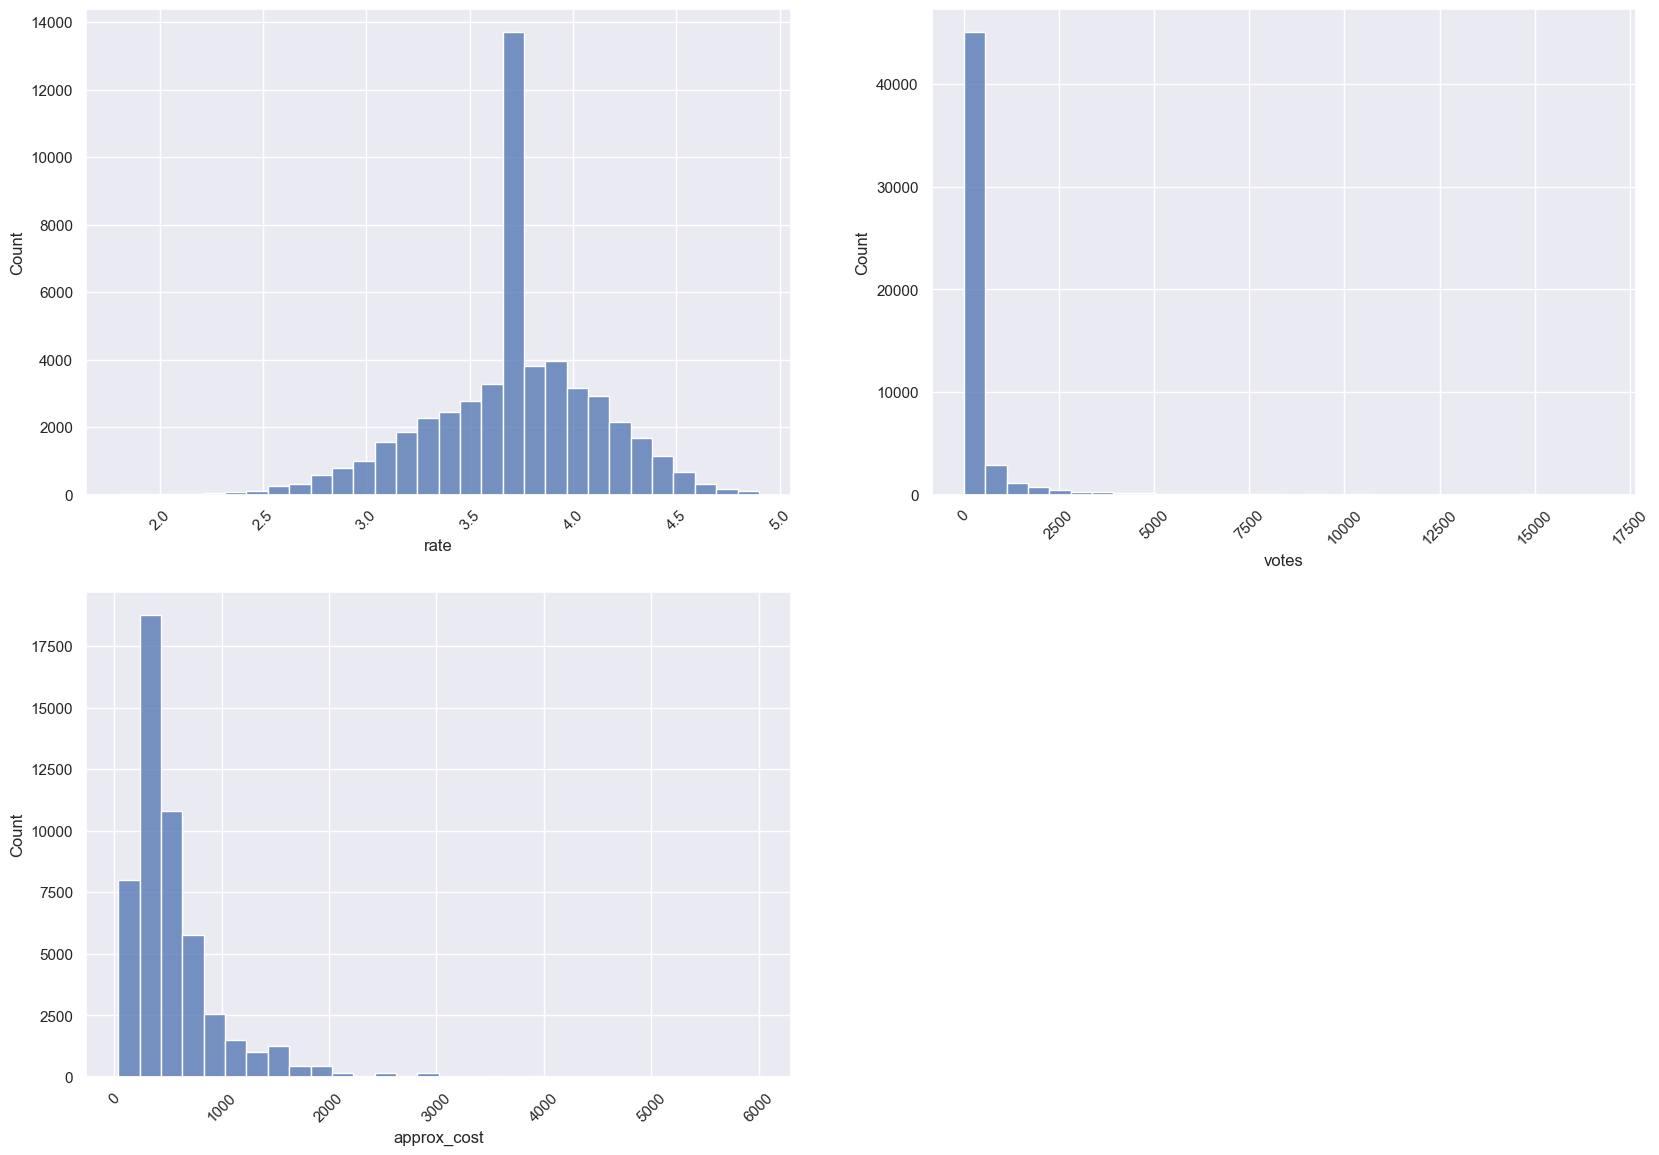

In [31]:
plt.figure(figsize=(20,150))
for i in enumerate(Numerical_features):
    plt.subplot(20,2,i[0]+1)
    sns.set(rc={'figure.figsize':(5,5)})
    sns.histplot(data=df,x=i[1],bins=30)
    plt.xticks(rotation=45)

Reset the index

In [32]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)  # 0 to drop index or row and 1 is used to drop label or column(by default it is 0)

# Data visualization

Let's check for the Most Famous restaurants chains in Bengaluru

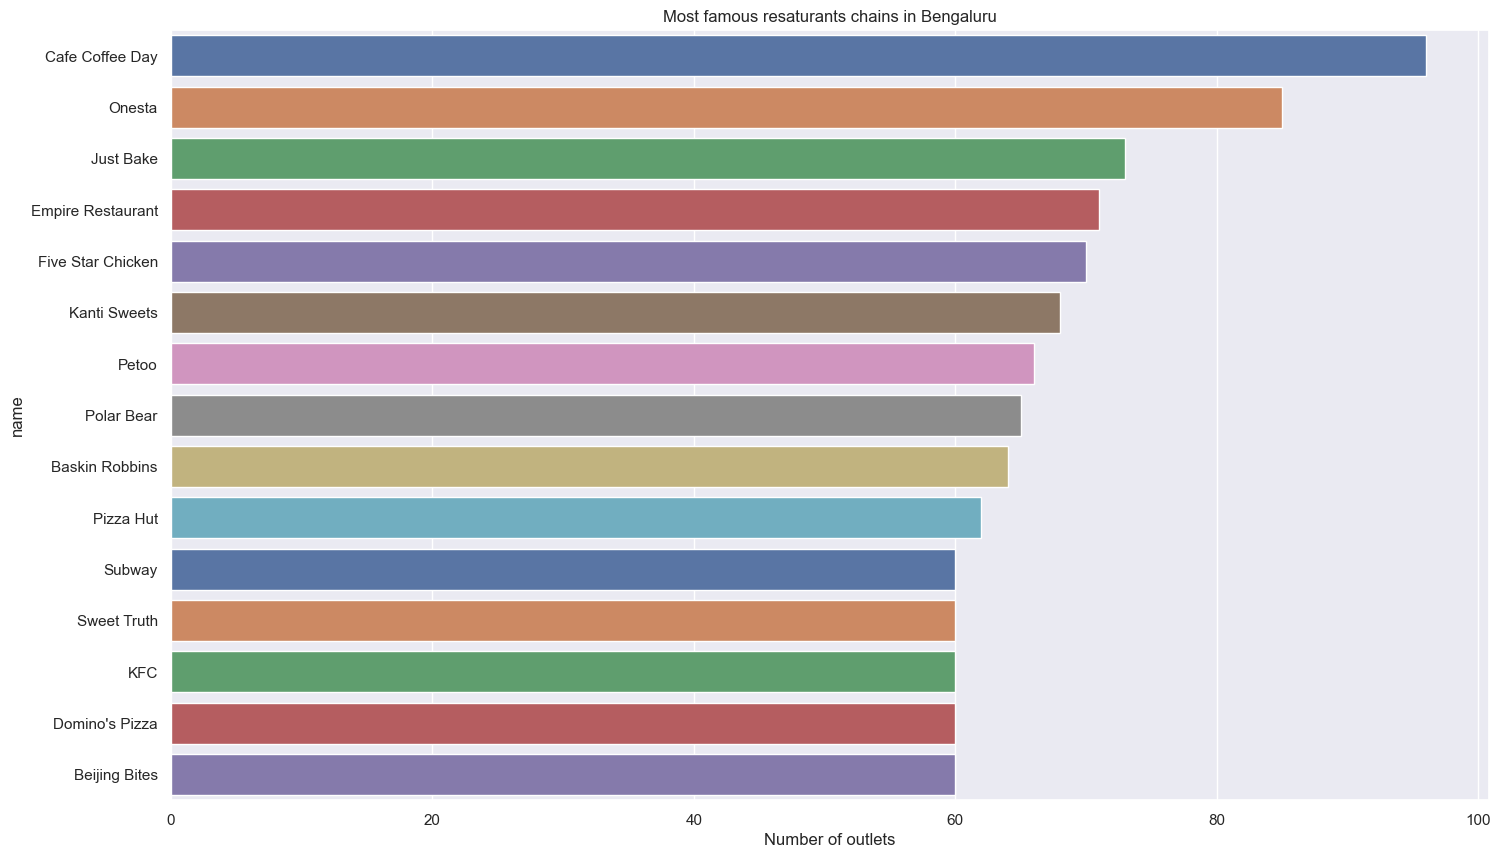

In [33]:
plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:15]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous resaturants chains in Bengaluru")
plt.xlabel("Number of outlets")
plt.show()

Let's check for the restrurants who have got the highest orders

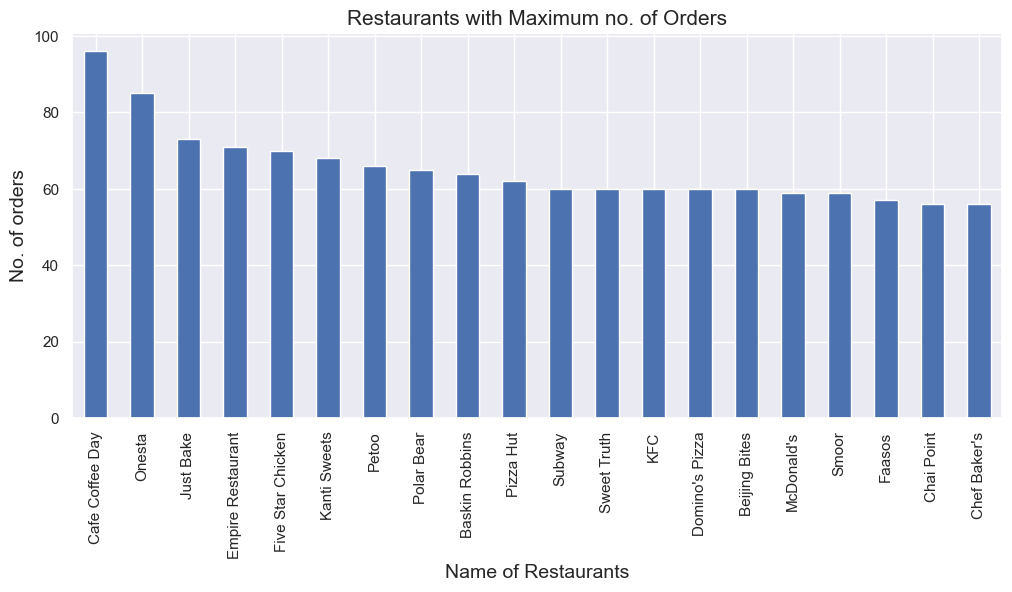

In [34]:
plt.figure(figsize=(12,5))
data=df['name'].value_counts()[:20]
data.plot(kind='bar')
plt.xlabel("Name of Restaurants",size=14)
plt.ylabel("No. of orders",size=14)
plt.title("Restaurants with Maximum no. of Orders",fontsize=15)
plt.show()

Let's check how many restaurants have online ordering facilities

In [35]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51143,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1500.0,Whitefield
51144,Vinod Bar And Restaurant,No,No,3.7,0,Whitefield,Bar,Finger Food,600.0,Whitefield
51145,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.7,0,Whitefield,Bar,Finger Food,2000.0,Whitefield
51146,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,Whitefield


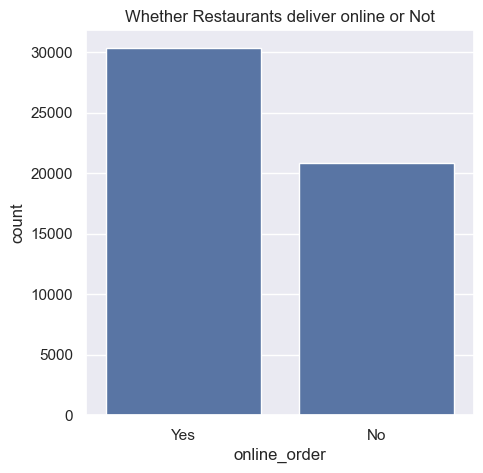

In [36]:
sns.countplot(data=df,x=df['online_order'])
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.title("Whether Restaurants deliver online or Not")
plt.show()

Let's check how many restraurants offer pre booking or table bookings

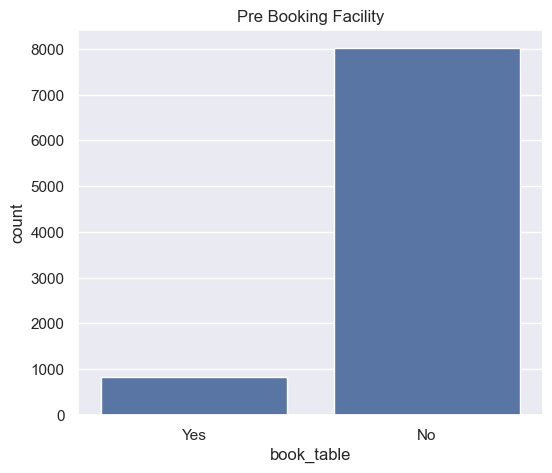

In [37]:
data=df[['name','book_table']].drop_duplicates()

plt.figure(figsize=(6,5))
fx=sns.countplot(x='book_table',data=data).set_title("Pre Booking Facility",fontsize=12)
plt.show()

Above execution show less than 1000 restaurants have prebooking table facility

Let's check the locations that have highest orders

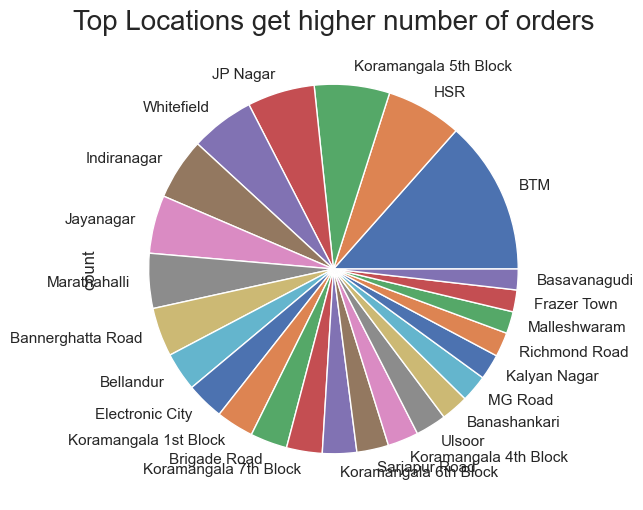

In [38]:
plt.figure(figsize=(12,6))
data=df.location.value_counts()[0:25]
data.plot(kind='pie')
plt.title('Top Locations get higher number of orders',size=20)
plt.show()

Let's check for the most common rating for the orders

<Axes: xlabel='rate', ylabel='Density'>

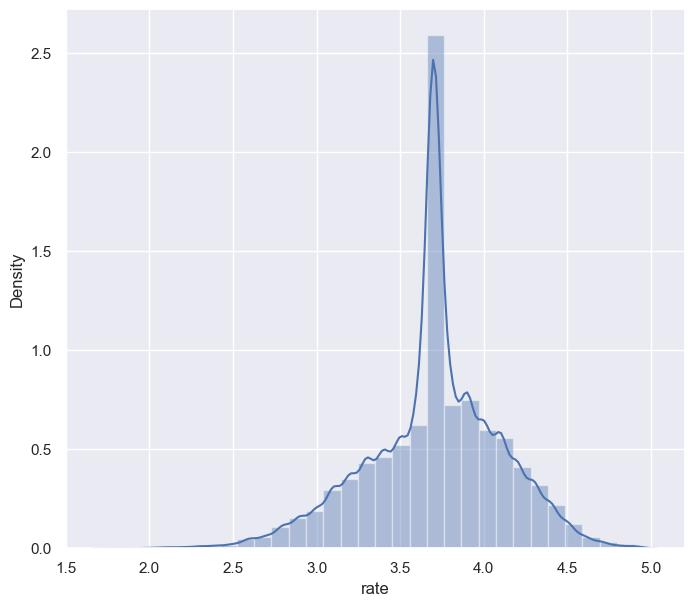

In [39]:
plt.figure(figsize=(8,7))
sns.distplot(df['rate'],bins=30)

Above execution shows us that maximum number of orders got 3.7 rating for their resturants.

# Let's check for the common approximate costs for meal of two people

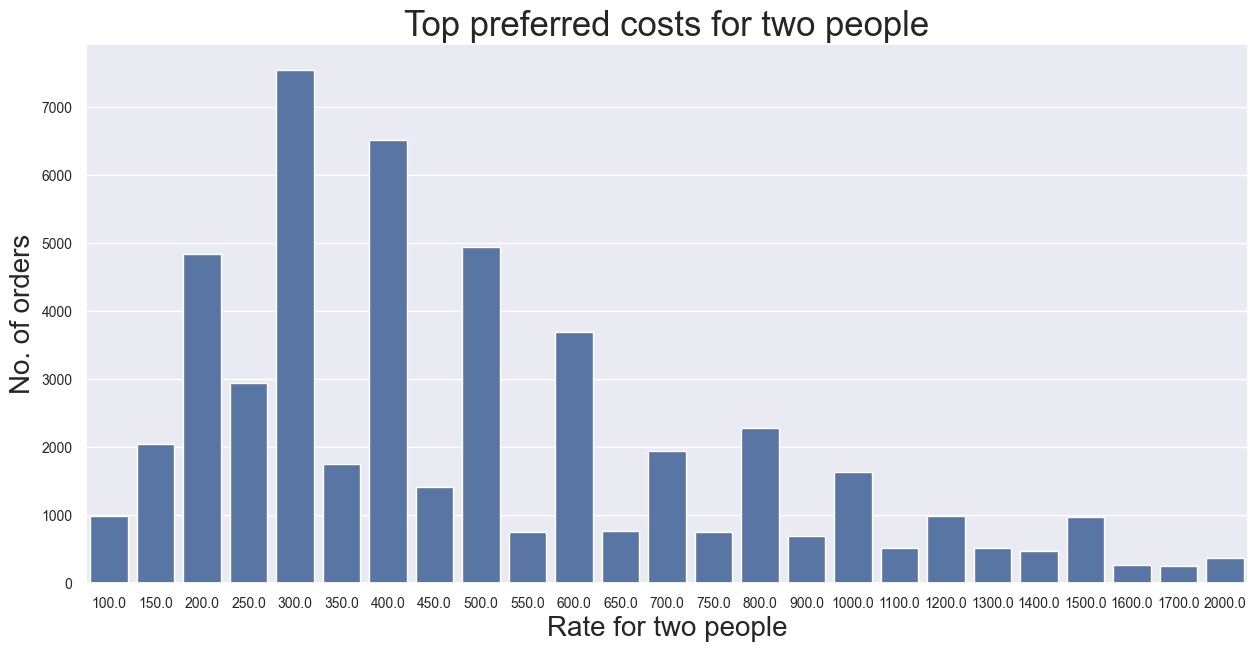

In [40]:
data=pd.DataFrame(df['approx_cost'].value_counts().reset_index()[:25])
data.columns=['approx_cost','count']
data=data.set_index('approx_cost')
plt.figure(figsize=(15,7))
sns.barplot(x=data.index,y=data['count'])
plt.xlabel('Rate for two people',size=20)
plt.ylabel('No. of orders',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Top preferred costs for two people',size=25)
plt.show()

Let's check top 10 types of the orders restaurants offer

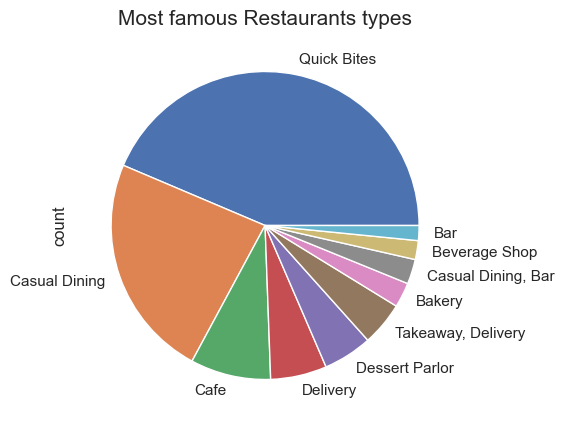

In [41]:
plt.figure(figsize=(12,5))
abc=df.rest_type.value_counts()[:10]
abc.plot(kind='pie')
plt.title("Most famous Restaurants types",fontsize=15)
plt.show()

Let's check for the Most famous Cusines among people

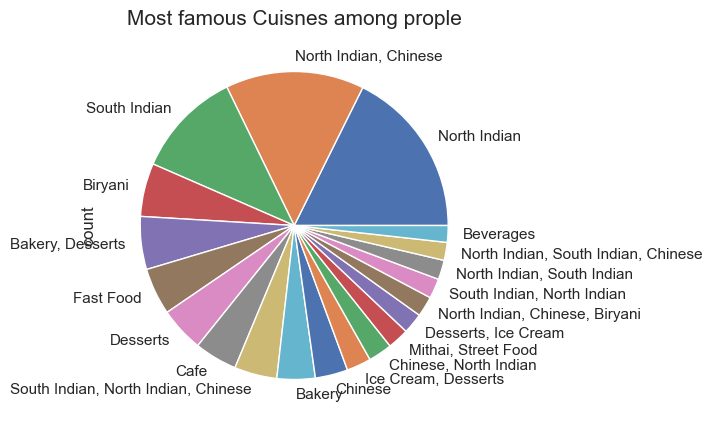

In [42]:
plt.figure(figsize=(12,5))
xyz=df.cuisines.value_counts()[:20].plot(kind='pie')
plt.title("Most famous Cuisnes among prople",fontsize=15)
plt.show()

Let's check for the top locations with the most number of restaurants

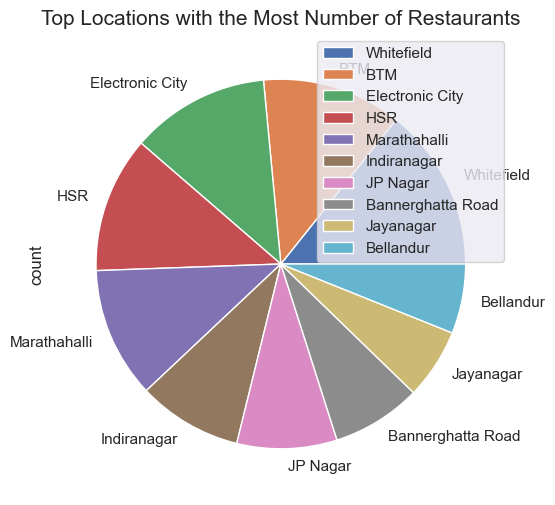

In [43]:
loc=pd.DataFrame(df.groupby(by='location')['name'].nunique())
loc.columns=['count']
loc.sort_values(by='count',ascending=False,inplace=True)
plt.rcParams['figure.figsize']=(8,6)
ax=loc[0:10].plot(kind='pie',subplots=True)
plt.title("Top Locations with the Most Number of Restaurants",size=15)
plt.show()

# Let's find the relationship between the features

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'rate'), Text(0, 1.5, 'votes'), Text(0, 2.5, 'approx_cost')])

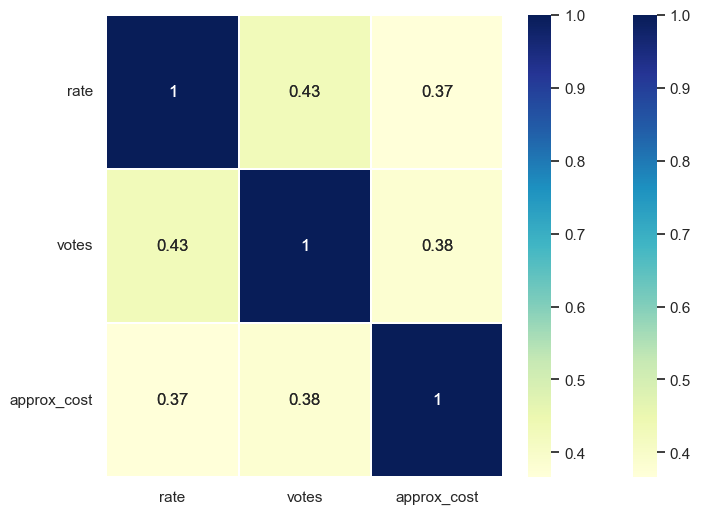

In [44]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), linewidths=.1, cmap='YlGnBu', annot=True)
plt.yticks(rotation=0)
sns.heatmap(df.select_dtypes(include=['number']).corr(), linewidths=.1, cmap='YlGnBu', annot=True)
plt.yticks(rotation=0)


# Let's build our model

In [45]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


Let's convert the categorical variables into a numeric format

For column "online_order"

In [46]:
df.online_order[df.online_order=='Yes']=1
df.online_order[df.online_order=='No']=0

In [47]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,1,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,1,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,1,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,0,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,0,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


For column "book_table"

In [48]:
df.book_table[df.book_table=='Yes']=1
df.book_table[df.book_table=='No']=0

In [49]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


For the rest type column(Feature scaling)

In [50]:
#one hot encoding
rest_df = pd.DataFrame(df['rest_type'])
rts = list(rest_df.rest_type.str.split(", "))
unique_rts = list(set([rt for sub_list in rts for rt in sub_list])) #list comprehension

for rt in unique_rts:
    rest_df[rt] = int(0)
    
rest_df.head()

,rest_type,Beverage Shop,Lounge,Pub,Sweet Shop,Casual Dining,Delivery,Kiosk,Bar,Pop Up,...,Cafe,Dessert Parlor,Fine Dining,Microbrewery,Meat Shop,Dhaba,Bakery,Food Truck,Irani Cafee,Bhojanalya
0,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Quick Bites,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
count = 0
for i in rts:
    rest_df.loc[count, i] = int(1)       
    count+=1

In [52]:
rest_df.head()

,rest_type,Beverage Shop,Lounge,Pub,Sweet Shop,Casual Dining,Delivery,Kiosk,Bar,Pop Up,...,Cafe,Dessert Parlor,Fine Dining,Microbrewery,Meat Shop,Dhaba,Bakery,Food Truck,Irani Cafee,Bhojanalya
0,Casual Dining,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Casual Dining,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Quick Bites,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Casual Dining,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
rest_df.drop(['rest_type'],axis=1,inplace=True)
rest_df.head()

,Beverage Shop,Lounge,Pub,Sweet Shop,Casual Dining,Delivery,Kiosk,Bar,Pop Up,Takeaway,...,Cafe,Dessert Parlor,Fine Dining,Microbrewery,Meat Shop,Dhaba,Bakery,Food Truck,Irani Cafee,Bhojanalya
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For "cuisines" column

In [54]:
cuisines_df = pd.DataFrame(df['cuisines'])
cuisines = list(cuisines_df.cuisines.str.split(", "))
unique_cuisines = list(set([cs for sub_list in cuisines for cs in sub_list]))
unique_cuisines.remove("Cafe") 
unique_cuisines.remove("Bakery")

for cn in unique_cuisines:
    cuisines_df[cn] = 0   
    
cuisines_df.head()

,cuisines,Charcoal Chicken,Iranian,Indian,Burmese,Naga,Lucknowi,Korean,Chinese,Gujarati,...,Beverages,Tea,Parsi,Jewish,Andhra,Oriya,Arabian,Wraps,Rolls,Goan
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
correct_cn = []
for i in cuisines:
    if "Cafe" in i:
        i.remove("Cafe") 
    if "Bakery" in i:
        i.remove("Bakery")
    correct_cn.append(list(set(i)))
    
    count = 0
for i in correct_cn:
    cuisines_df.loc[count, i] = int(1)
    count+=1
    
    
cuisines_df.head()

,cuisines,Charcoal Chicken,Iranian,Indian,Burmese,Naga,Lucknowi,Korean,Chinese,Gujarati,...,Beverages,Tea,Parsi,Jewish,Andhra,Oriya,Arabian,Wraps,Rolls,Goan
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
cuisines_df.drop(['cuisines'], axis = 1, inplace=True)
cuisines_df.head()

,Charcoal Chicken,Iranian,Indian,Burmese,Naga,Lucknowi,Korean,Chinese,Gujarati,BBQ,...,Beverages,Tea,Parsi,Jewish,Andhra,Oriya,Arabian,Wraps,Rolls,Goan
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For the "Location" column

In [57]:
location_df = df['location']
location_df = pd.get_dummies(location_df)
location_df.head()

,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,Bellandur,Bommanahalli,Brigade Road,Brookefield,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


For the "area" column

In [58]:
area_df = df['area']
area_df = pd.get_dummies(area_df)
area_df.head()

,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now concatinate all the dataframes

In [59]:
data_with_location = pd.concat([df, rest_df, cuisines_df, location_df], axis=1)
data_with_location.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False


In [60]:
data_with_area = pd.concat([df, rest_df, cuisines_df, area_df], axis = 1)
data_with_area.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False


# Let's do the feature Selection

In [61]:
data_with_location.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'area'], axis = 1, inplace=True)
data_with_area.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'area'], axis=1, inplace=True)
print(data_with_location.columns[200:])


Index(['RT Nagar', 'Race Course Road', 'Rajajinagar', 'Rajarajeshwari Nagar',
       'Rammurthy Nagar', 'Residency Road', 'Richmond Road', 'Sadashiv Nagar',
       'Sahakara Nagar', 'Sanjay Nagar', 'Sankey Road', 'Sarjapur Road',
       'Seshadripuram', 'Shanti Nagar', 'Shivajinagar', 'South Bangalore',
       'St. Marks Road', 'Thippasandra', 'Ulsoor', 'Uttarahalli',
       'Varthur Main Road, Whitefield', 'Vasanth Nagar', 'Vijay Nagar',
       'West Bangalore', 'Whitefield', 'Wilson Garden', 'Yelahanka',
       'Yeshwantpur'],
      dtype='object')


In [62]:
x1 = data_with_location.drop("rate", axis = 1).values
y1 = data_with_location["rate"].values

print("X = ", x1)
print("Y = ", y1)

X =  [[1 1 775 ... False False False]
 [1 0 787 ... False False False]
 [1 0 918 ... False False False]
 ...
 [0 0 0 ... False False False]
 [0 1 236 ... False False False]
 [0 0 13 ... False False False]]
Y =  [4.1 4.1 3.8 ... 3.7 4.3 3.4]


In [63]:
x2 = data_with_area.drop("rate", axis = 1).values
y2 = data_with_area["rate"].values

print("X = ", x2)
print()
print("Y = ", y2)

X =  [[1 1 775 ... False False False]
 [1 0 787 ... False False False]
 [1 0 918 ... False False False]
 ...
 [0 0 0 ... False False True]
 [0 1 236 ... False False True]
 [0 0 13 ... False False True]]

Y =  [4.1 4.1 3.8 ... 3.7 4.3 3.4]


# Extra tree regressor

In [64]:
from sklearn.ensemble import ExtraTreesRegressor

In [67]:
imp_features1 = ExtraTreesRegressor()
imp_features1.fit(x1, y1)
print(imp_features1.feature_importances_)

[ 1.68812846e-02  1.66464087e-01  2.90153317e-01  4.83404296e-02
  1.18934831e-03  3.12570157e-03  1.78838169e-03  7.38204634e-04
  1.02751289e-02  5.55380823e-03  3.84003537e-04  2.59695411e-03
  2.24896830e-18  3.06331822e-03  1.07618932e-05  1.04637058e-02
  9.76589058e-04  3.44000529e-03  9.53367894e-05  1.24888274e-02
  3.40829193e-03  5.54835596e-04  7.98593270e-04  8.11957668e-06
  1.99925169e-04  3.01908096e-03  8.11541335e-05  4.04668916e-07
  6.68991767e-07  5.83576109e-04  3.32396062e-05  9.56902611e-17
  2.27590458e-04  1.35658321e-05  2.84440421e-04  1.84044567e-04
  1.28491580e-02  3.29679224e-04  1.37114744e-03  6.53097096e-05
  1.94220963e-03  3.76569507e-04  2.18752404e-05  2.43304648e-03
  9.58582339e-06  1.71934093e-03  5.27846779e-05  3.38606307e-04
  3.49725376e-03  6.54838505e-07  1.29189081e-04  2.89330682e-03
  1.04166018e-02  3.92262506e-03  2.25935649e-03  4.34670962e-04
  6.53301213e-03  4.04969718e-04  3.42852858e-05  2.90630290e-06
  1.63682089e-03  1.95934

<Axes: >

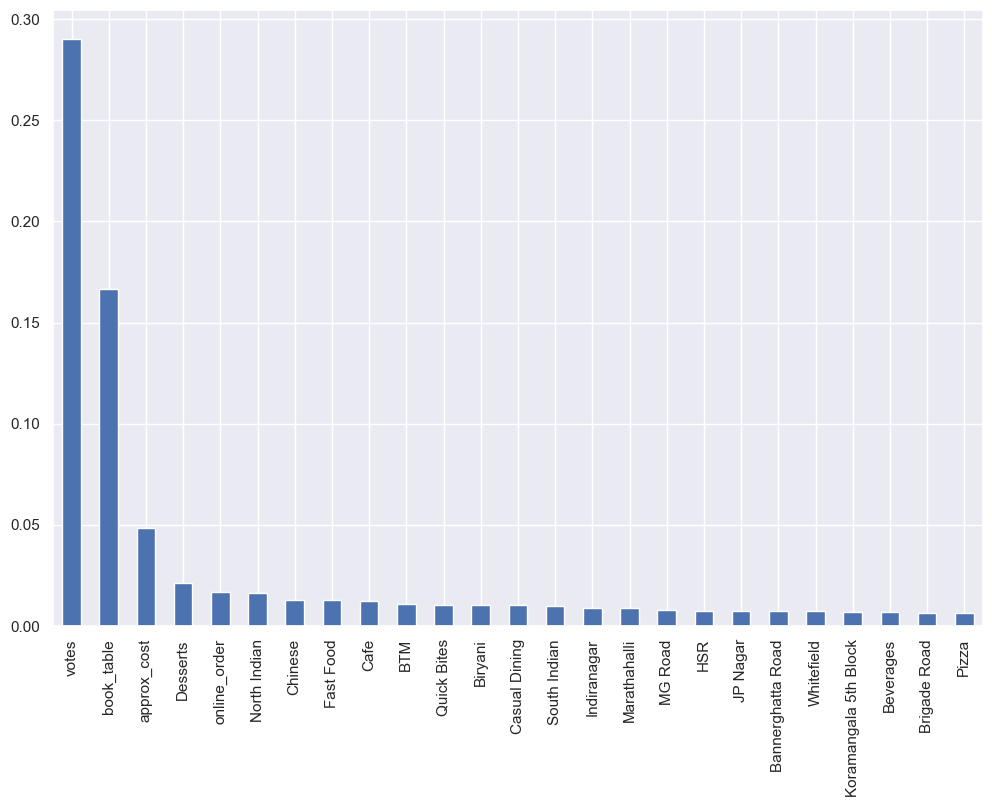

In [68]:
plt.figure(figsize = (12, 8))
columns = data_with_location.drop("rate", axis = 1).columns
fseries = pd.Series(imp_features1.feature_importances_, index = columns)
fseries.nlargest(25).plot(kind = "bar")

In [69]:
imp_features2 = ExtraTreesRegressor()
imp_features2.fit(x2, y2)
print(imp_features2.feature_importances_)

[2.12460955e-02 1.67422485e-01 3.21496146e-01 7.12723494e-02
 1.62546597e-03 3.81228291e-03 2.82167249e-03 9.61647487e-04
 1.17240092e-02 6.40850805e-03 4.97492205e-04 3.47144786e-03
 1.23287180e-16 3.74191047e-03 2.09056294e-05 1.24342684e-02
 1.31753391e-03 3.96686347e-03 9.88395813e-05 1.37909363e-02
 3.60374834e-03 7.80211515e-04 1.01623222e-03 7.48632197e-06
 2.02942055e-04 4.12979482e-03 2.14295701e-04 2.13226771e-06
 7.96687825e-07 6.69387459e-04 9.05944281e-05 3.14751150e-18
 2.29325313e-04 1.09013505e-05 3.05470221e-04 2.23099028e-04
 1.43648040e-02 3.78827403e-04 2.10065802e-03 5.60725727e-05
 2.92864617e-03 5.11348054e-04 4.89975425e-05 3.23078459e-03
 1.71833007e-05 2.62311823e-03 1.38008960e-04 4.07944452e-04
 3.44893566e-03 1.08532684e-06 1.96977498e-04 3.37491000e-03
 1.25805383e-02 5.42082560e-03 3.11501260e-03 7.29875340e-04
 8.11110882e-03 4.18965937e-04 6.17894648e-05 4.90695956e-06
 2.20654227e-03 2.54593511e-03 7.62421786e-04 1.85108664e-04
 5.13831674e-06 9.065199

<Axes: >

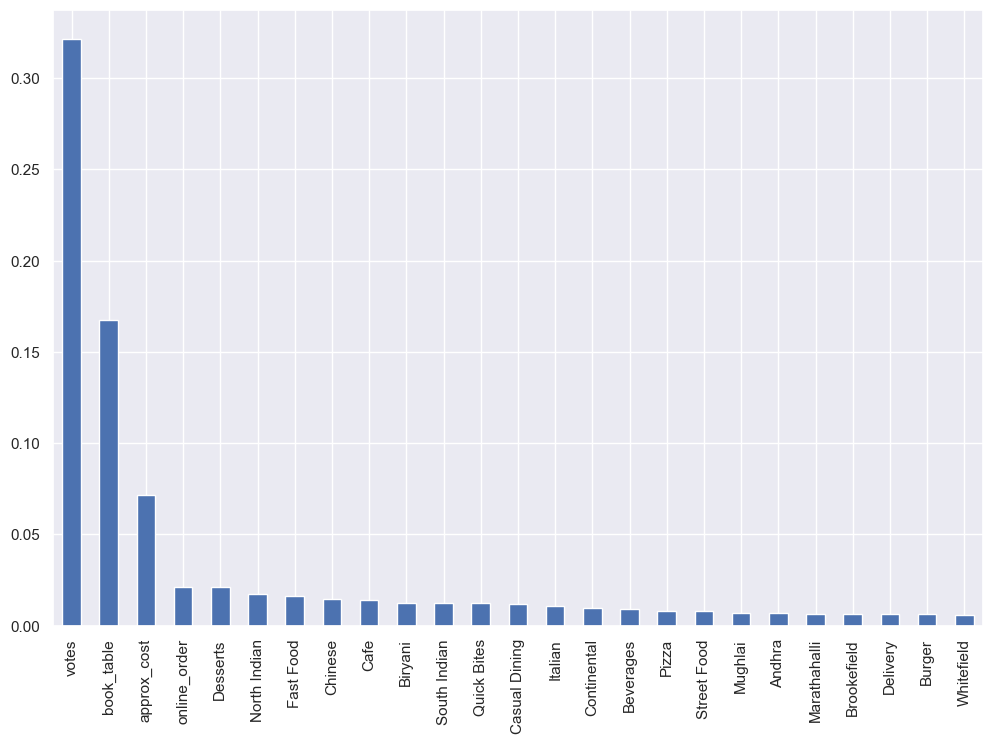

In [70]:
plt.figure(figsize = (12,8))
columns = data_with_area.drop("rate", axis = 1).columns
fseries = pd.Series(imp_features2.feature_importances_, index = columns)
fseries.nlargest(25).plot(kind = "bar")

# Train Test splitting of data

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [73]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2, y2, test_size=0.2, random_state=45)


# Let's import ML model

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Linera Regression

In [75]:
lr1 = LinearRegression()
lr1.fit(X1_train, Y1_train)

LinearRegression()

In [76]:
Y_lr1= lr1.predict(X1_test)
Y_lr1[:200]

array([3.59842095, 3.79314729, 3.58246313, 3.48453781, 3.54911858,
       3.86078185, 3.57360405, 3.49362775, 3.86837198, 3.53854682,
       3.53894707, 3.66695723, 3.52999025, 3.61098495, 4.13777133,
       3.38109923, 3.79516245, 4.33883224, 3.50354697, 3.429606  ,
       3.45267673, 3.47351886, 3.84281261, 3.61792553, 3.51014983,
       3.53499089, 3.84186274, 3.78805962, 3.64354086, 3.51003124,
       3.63136543, 3.68449124, 3.94075469, 3.7367096 , 3.50586451,
       3.46090123, 4.49197891, 3.5768909 , 3.44830891, 3.79047545,
       3.61026277, 3.80753047, 3.55868624, 3.77055884, 3.4899659 ,
       3.60305986, 3.62821693, 3.49645813, 4.43527374, 4.16001406,
       3.51686224, 4.42523589, 3.63541475, 3.43397489, 3.61012108,
       3.72063299, 3.59530734, 3.54345125, 3.62358271, 3.52398522,
       3.76933367, 3.82226402, 3.48584428, 3.65376135, 4.02413128,
       4.30118549, 3.48148102, 3.61607414, 3.76684806, 3.50513566,
       3.66760143, 3.47916749, 3.60942462, 3.53674262, 3.44939

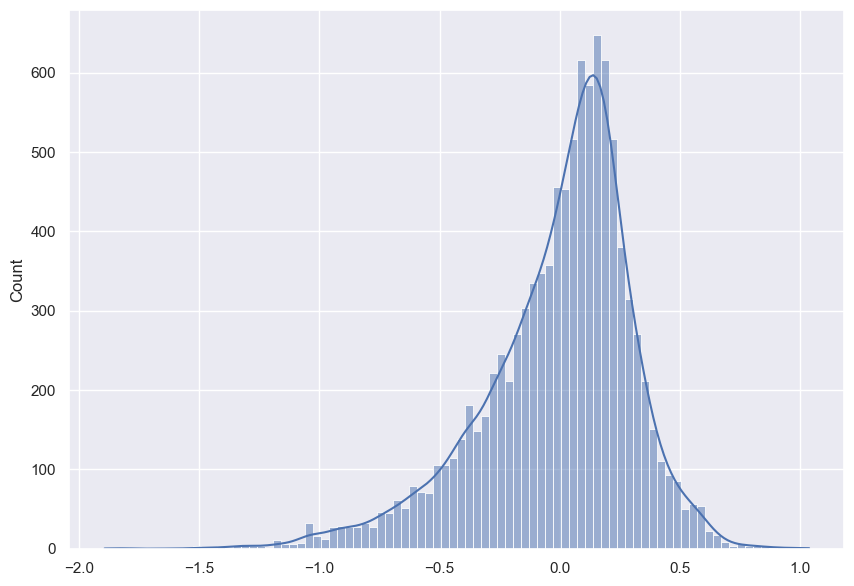

In [77]:
plt.figure(figsize=(10,7))
sns.histplot(Y1_test - Y_lr1, kde=True)
plt.show()


# For the data with area

In [78]:
lr2 = LinearRegression()
lr2.fit(X2_train, Y2_train)

LinearRegression()

In [79]:
Y_lr2 = lr2.predict(X2_test)
Y_lr2[:200]


array([3.51048882, 3.64624727, 3.91010291, 3.5310687 , 3.63902146,
       3.50307539, 4.12011187, 3.80908364, 3.67520392, 3.50085444,
       3.60862335, 3.70999879, 3.67316422, 4.08726229, 3.65341947,
       3.65980031, 4.04504739, 3.58494806, 4.14987018, 3.58862444,
       3.64562671, 3.83260972, 3.50762822, 3.68342688, 3.70324063,
       3.95263685, 4.13305177, 3.46835315, 3.47583025, 3.63654953,
       3.72160944, 3.69534413, 3.8050545 , 3.77048172, 3.53513794,
       3.48923858, 4.28697051, 3.50903821, 3.75349993, 3.69338207,
       3.70443475, 3.60136421, 4.05891546, 3.61024504, 3.55934397,
       3.81244436, 3.81456064, 3.50414448, 3.43098915, 3.51496927,
       3.50303322, 3.82541065, 3.83833245, 3.52617849, 3.85815489,
       3.84711823, 3.57644781, 3.67179775, 3.55948445, 3.57708213,
       3.63459424, 4.12782089, 3.59805804, 3.48051497, 4.20969075,
       3.78838586, 3.97159693, 3.64282754, 3.63616819, 3.78291687,
       3.67089778, 3.88598112, 3.53337802, 3.78804375, 3.50613

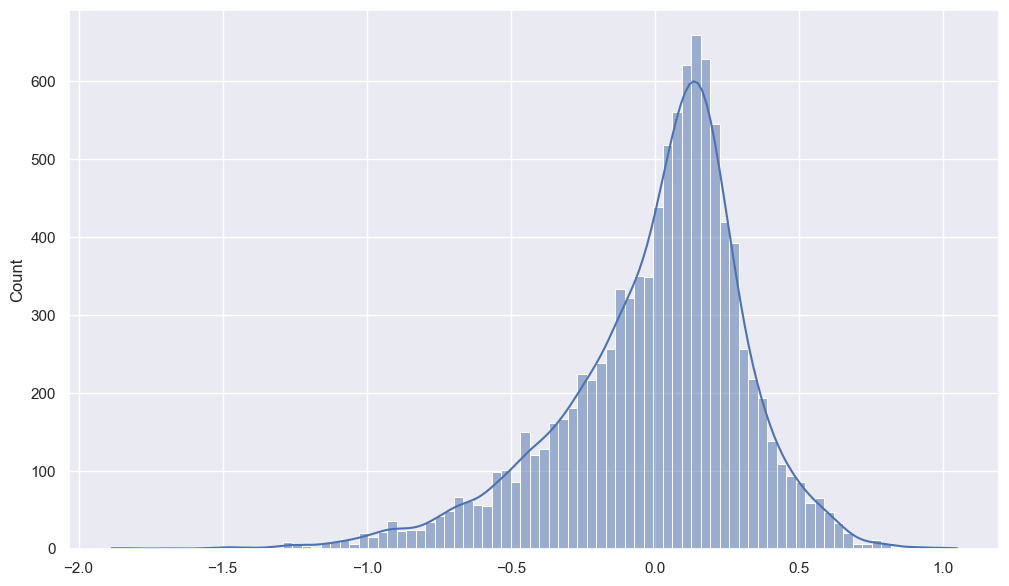

In [80]:
plt.figure(figsize=(12,7))
sns.histplot(Y2_test-Y_lr2, kde=True)
plt.show()

# Random Forest Regression

For data_with_location

In [81]:
rf1 = RandomForestRegressor()
rf1.fit(X1_train, Y1_train)

RandomForestRegressor()

In [82]:
Y_rf1 = rf1.predict(X1_test)
Y_rf1[:100]

array([3.2158    , 3.517     , 3.7       , 3.24134127, 3.25140476,
       4.1       , 3.59      , 3.7       , 4.195     , 3.7       ,
       3.5       , 3.7       , 3.7       , 3.7       , 4.345     ,
       3.23982143, 3.96531667, 4.2       , 3.7       , 3.2       ,
       3.152     , 3.7       , 3.7       , 3.7206    , 3.6       ,
       3.84653333, 3.7       , 4.3       , 3.5       , 3.371     ,
       3.509     , 3.30443095, 4.2       , 4.367     , 3.994     ,
       3.198     , 4.418     , 3.454     , 3.7       , 4.146     ,
       3.803     , 3.7       , 3.5904    , 4.142     , 3.51083333,
       3.584     , 4.012     , 3.281     , 4.4       , 4.196     ,
       3.8       , 4.2       , 3.7       , 3.006     , 3.7       ,
       3.848     , 3.3       , 3.807     , 3.699     , 3.7       ,
       3.7       , 3.904     , 2.889     , 3.67066667, 4.008     ,
       4.11075   , 3.294     , 3.104     , 3.975     , 3.3       ,
       3.7       , 3.696     , 3.608     , 3.33710714, 3.542  

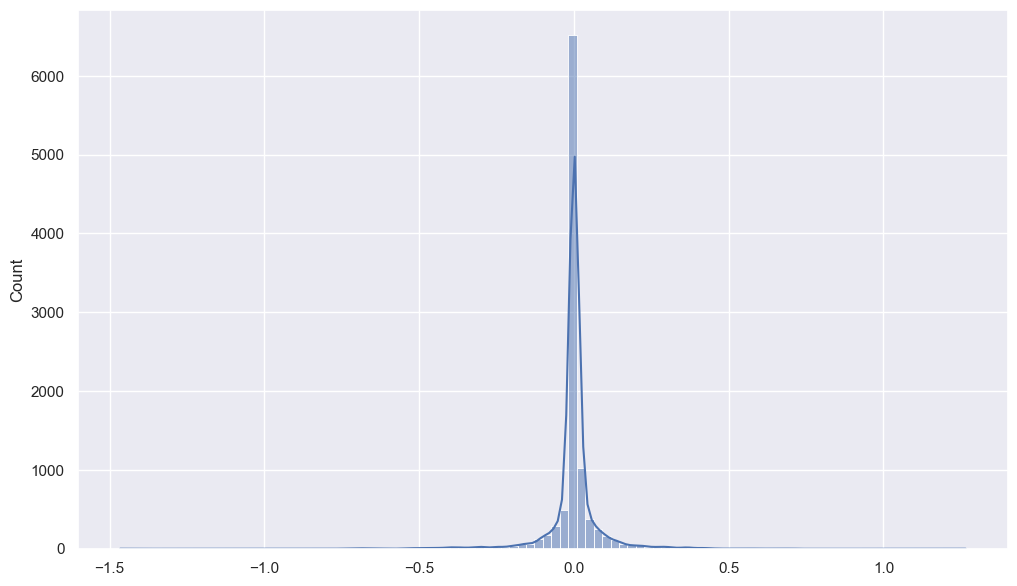

In [83]:
plt.figure(figsize=(12,7))
sns.histplot(Y1_test-Y_rf1, kde=True, bins=100)
plt.show()

For data_with_area

In [84]:
rf2 = RandomForestRegressor()
rf2.fit(X2_train, Y2_train)

RandomForestRegressor()

In [85]:
Y_rf2 = rf2.predict(X2_test)
Y_rf2[:100]

array([3.7       , 4.082     , 4.3       , 3.26      , 3.374     ,
       3.7       , 4.2       , 4.192     , 3.12675   , 3.826     ,
       3.49      , 3.7       , 3.7       , 4.187     , 3.68      ,
       3.3       , 4.42      , 3.764     , 4.257     , 3.7       ,
       4.166     , 3.99925   , 3.301     , 3.9       , 3.7       ,
       4.3       , 4.1       , 3.47966667, 3.7       , 3.7       ,
       3.608     , 3.892     , 4.08      , 3.894     , 3.7       ,
       3.218     , 4.49      , 3.165     , 3.114     , 3.504     ,
       2.846     , 3.977     , 4.538     , 3.7       , 3.7       ,
       4.086     , 3.913     , 2.893     , 3.574     , 3.527     ,
       2.996     , 4.03      , 3.7       , 3.033     , 3.692     ,
       3.887     , 3.572     , 3.774     , 3.7       , 3.402     ,
       3.415     , 4.203     , 3.882     , 3.7       , 4.4       ,
       4.002     , 4.039     , 3.713     , 3.433     , 3.871     ,
       3.164     , 4.105     , 3.7       , 3.7       , 3.733  

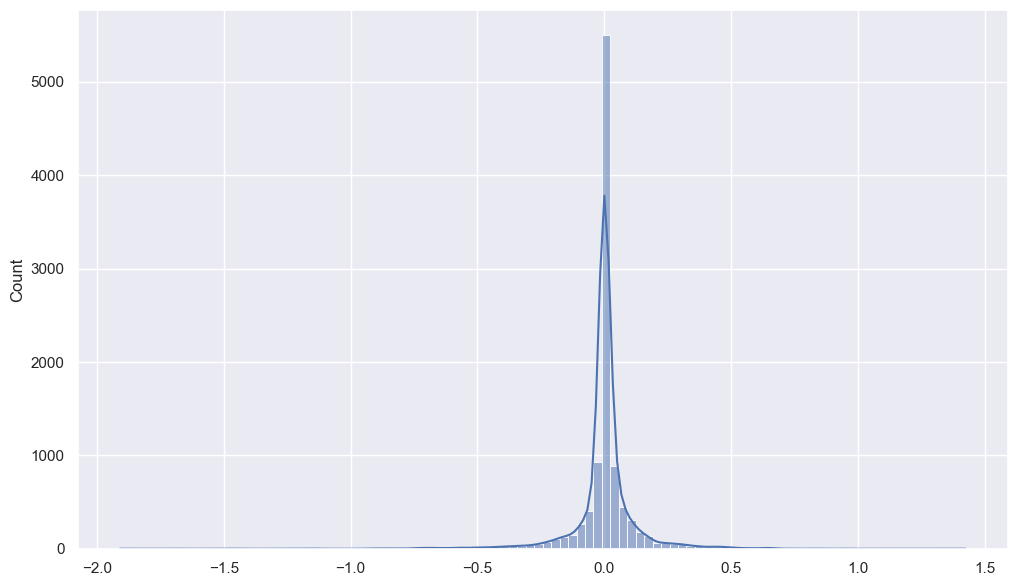

In [86]:
plt.figure(figsize=(12,7))
sns.histplot(Y2_test - Y_rf2, kde=True, bins=100)
plt.show()

# Decesion Tree Regressor

For data_with_location

In [87]:
dt1 = DecisionTreeRegressor()
dt1.fit(X1_train, Y1_train)

DecisionTreeRegressor()

In [88]:
Y_dt1 = dt1.predict(X1_test)
Y_dt1[:100]

array([3.2       , 2.9       , 3.7       , 3.2       , 3.2       ,
       4.1       , 3.6       , 3.7       , 4.2       , 3.7       ,
       3.5       , 3.7       , 3.7       , 3.7       , 4.4       ,
       3.2       , 4.05      , 4.2       , 3.7       , 3.2       ,
       3.1       , 3.7       , 3.7       , 3.75      , 3.6       ,
       3.85      , 3.7       , 4.3       , 3.5       , 3.4       ,
       3.5       , 3.3       , 4.2       , 4.4       , 4.        ,
       3.1       , 4.4       , 3.5       , 3.7       , 4.1       ,
       3.8       , 3.7       , 3.5       , 3.9       , 3.7       ,
       3.6       , 4.        , 3.3       , 4.4       , 4.2       ,
       3.8       , 4.2       , 3.7       , 3.        , 3.7       ,
       3.9       , 3.3       , 3.9       , 3.7       , 3.7       ,
       3.7       , 3.9       , 2.9       , 3.7       , 4.        ,
       4.1       , 3.3       , 3.1       , 4.        , 3.3       ,
       3.7       , 3.7       , 3.6       , 3.5       , 3.6    

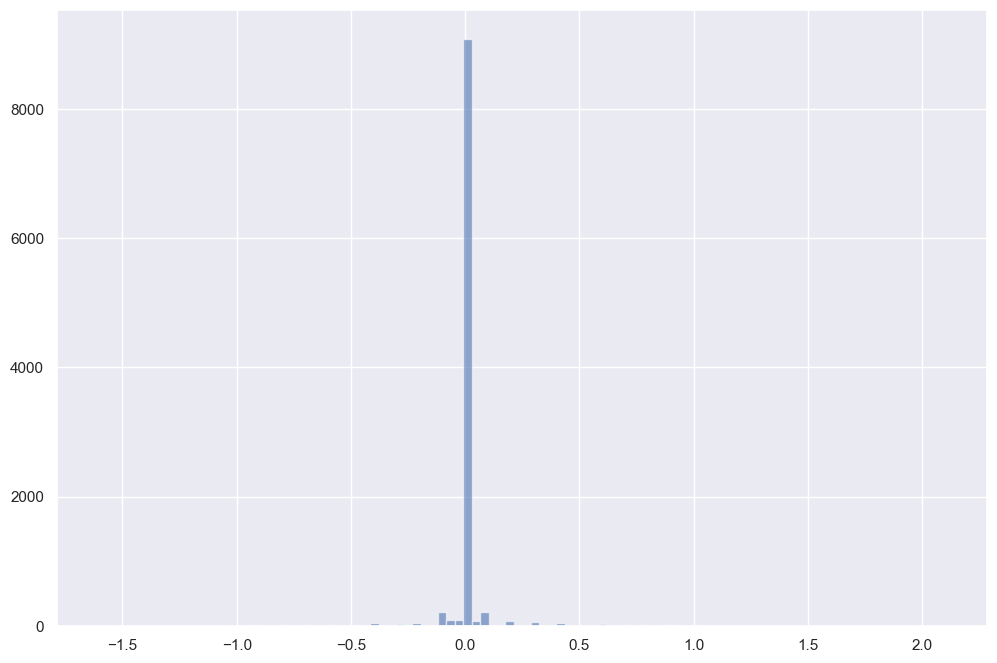

In [89]:
plt.figure(figsize=(12,8))
plt.hist(Y1_test-Y_dt1, bins=100, alpha=0.6)
plt.show()

For data_with_area

In [90]:
dt2 = DecisionTreeRegressor()
dt2.fit(X2_train, Y2_train)

DecisionTreeRegressor()

In [91]:
Y_dt2 = dt2.predict(X2_test)
Y_dt2[:100]

array([3.7 , 4.1 , 4.3 , 3.  , 3.5 , 3.7 , 4.2 , 4.2 , 3.1 , 3.9 , 3.7 ,
       3.7 , 3.7 , 4.2 , 3.7 , 3.3 , 4.4 , 2.8 , 4.3 , 3.7 , 4.2 , 4.  ,
       3.2 , 3.9 , 3.7 , 4.3 , 4.1 , 3.5 , 3.7 , 3.7 , 3.6 , 3.9 , 4.1 ,
       3.9 , 3.7 , 3.3 , 4.5 , 3.1 , 2.8 , 3.5 , 2.8 , 3.8 , 4.6 , 3.7 ,
       3.7 , 4.6 , 3.9 , 2.7 , 3.7 , 3.5 , 3.1 , 4.1 , 3.7 , 3.  , 3.6 ,
       3.9 , 3.6 , 3.9 , 3.7 , 3.4 , 3.4 , 4.2 , 4.  , 3.7 , 4.4 , 4.  ,
       4.  , 3.7 , 3.4 , 4.1 , 3.1 , 4.1 , 3.7 , 3.7 , 3.9 , 4.8 , 3.4 ,
       3.9 , 4.1 , 4.  , 3.6 , 3.7 , 4.5 , 3.7 , 3.8 , 3.8 , 3.5 , 4.3 ,
       4.5 , 3.1 , 3.7 , 3.3 , 3.85, 3.9 , 3.2 , 4.  , 3.7 , 3.7 , 3.3 ,
       3.9 ])

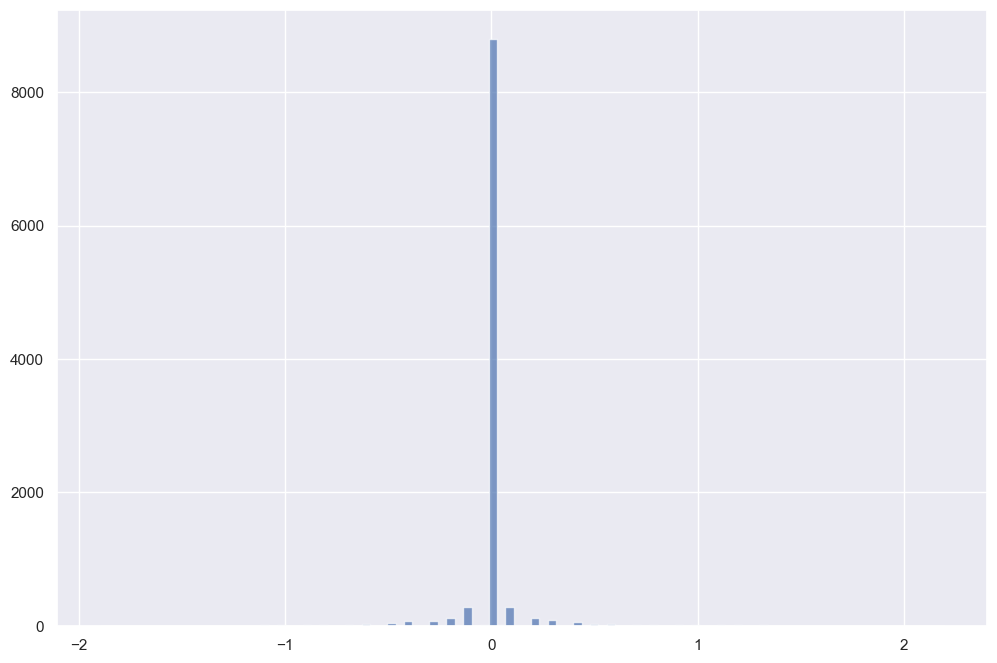

In [92]:
plt.figure(figsize=(12,8))
plt.hist(Y2_test - Y_dt2, bins=100, alpha=0.7)
plt.show()

# Model Evaluation

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression Model

For data_with_location

In [94]:
mae =  mean_absolute_error(Y1_test, Y_lr1)
mse = mean_squared_error(Y1_test, Y_lr1)
r2score = r2_score(Y1_test, Y_lr1)

print("Coefficient of Determination for train data : ",lr1.score(X1_train, Y1_train))
print("Coefficient of Determination for test data : ",lr1.score(X1_test, Y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.35719946892107624
Coefficient of Determination for test data :  0.3581551910448725
Mean Absolute Error :  0.24026687273294942
Mean Squared Error :  0.10121314845707678
Root Mean Squared Error :  0.3181401396508727
R2 Score :  0.3581551910448725


For data_with_area

In [95]:
mae =  mean_absolute_error(Y2_test, Y_lr2)
mse = mean_squared_error(Y2_test, Y_lr2)
r2score = r2_score(Y2_test, Y_lr2)

print("Coefficient of Determination for train data : ",lr2.score(X2_train, Y2_train))
print("Coefficient of Determination for test data : ",lr2.score(X2_test, Y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.34422351544164753
Coefficient of Determination for test data :  0.3442017563355658
Mean Absolute Error :  0.24307669761575565
Mean Squared Error :  0.10278300226406122
Root Mean Squared Error :  0.32059788250090054
R2 Score :  0.3442017563355658


# Random Forest Regression Model

For data_with_location

In [96]:
mae =  mean_absolute_error(Y1_test, Y_rf1)
mse = mean_squared_error(Y1_test, Y_rf1)
r2score = r2_score(Y1_test, Y_rf1)

print("Coefficient of Determination for train data : ",rf1.score(X1_train, Y1_train))
print("Coefficient of Determination for test data : ",rf1.score(X1_test, Y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.9903230550076735
Coefficient of Determination for test data :  0.9429013698114702
Mean Absolute Error :  0.035936104618808154
Mean Squared Error :  0.00900393997635559
Root Mean Squared Error :  0.09488909303157866
R2 Score :  0.9429013698114702


For data_with_area

In [97]:
mae =  mean_absolute_error(Y2_test, Y_rf2)
mse = mean_squared_error(Y2_test, Y_rf2)
r2score = r2_score(Y2_test, Y_rf2)

print("Coefficient of Determination for train data : ",rf2.score(X2_train, Y2_train))
print("Coefficient of Determination for test data : ",rf2.score(X2_test, Y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.9843204394269217
Coefficient of Determination for test data :  0.8861634694235608
Mean Absolute Error :  0.05922889857729284
Mean Squared Error :  0.017841554918768644
Root Mean Squared Error :  0.1335722834976203
R2 Score :  0.8861634694235608


# Decesion Tree Regression Model

For data_with_location

In [98]:
mae =  mean_absolute_error(Y1_test, Y_dt1)
mse = mean_squared_error(Y1_test, Y_dt1)
r2score = r2_score(Y1_test, Y_dt1)

print("Coefficient of Determination for train data : ",dt1.score(X1_train, Y1_train))
print("Coefficient of Determination for test data : ",dt1.score(X1_test, Y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.998763195049567
Coefficient of Determination for test data :  0.9158469383367255
Mean Absolute Error :  0.02553457384916736
Mean Squared Error :  0.013270180274743025
Root Mean Squared Error :  0.11519626849313751
R2 Score :  0.9158469383367255


For data_with_area

In [99]:
mae =  mean_absolute_error(Y2_test, Y_dt2)
mse = mean_squared_error(Y2_test, Y_dt2)
r2score = r2_score(Y2_test, Y_dt2)


print("Coefficient of Determination for train data : ",dt2.score(X2_train, Y2_train))
print("Coefficient of Determination for test data : ",dt2.score(X2_test, Y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.9992833408296304
Coefficient of Determination for test data :  0.8327432670728194
Mean Absolute Error :  0.04364311315930364
Mean Squared Error :  0.026214082341962527
Root Mean Squared Error :  0.16190763521823956
R2 Score :  0.8327432670728194


All the Three Models has been tranied, Linear regression, Random forest regression and Decision tree regression.
In this model best model for prediction is Random forest regression model.so we will be using Random forest regression model.
Selected model accuracy is 90% up.

# Save Model

In [5]:
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Example training data
X, y = make_regression(n_samples=100, n_features=2, noise=0.1)

# Train model
model = RandomForestRegressor()
model.fit(X, y)

# Save model
with open('rating_model.pkl', 'wb') as f:
    pickle.dump(model, f)